## **양방향 RNN으로 imdb 데이터 분석하기**

언어를 이해하는 데, 단어의 순서가 중요하지만 결정적이지는 않다. 따라서 단어의 시퀀스를 반대로 바꿔서 RNN을 돌려봐도, 성능이 낮아지지 않을 수 있다.

거꾸로 된 시퀀스에서 훈련한 RNN은 원래 시퀀스에서 훈련한 것과는 다른 표현을 학습한다. 머신러닝에서 다른 표현이 유용하다면 항상 사용할 가치가 있다.

케라스의 bidirectional 층은 하나는 시간 순서대로 시퀀스를 처리하고, 다른 하나는 시간 순서 반대로 시퀀스를 처리한 후, 그 결과를 합쳐 모델을 만든다.

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Epoch 1/10
157/157 [==============================] - 70s 433ms/step - loss: 0.5971 - acc: 0.6600 - val_loss: 0.4037 - val_acc: 0.8330
Epoch 2/10
157/157 [==============================] - 70s 448ms/step - loss: 0.3162 - acc: 0.8782 - val_loss: 0.3294 - val_acc: 0.8676
Epoch 3/10
157/157 [==============================] - 69s 440ms/step - loss: 0.2495 - acc: 0.9085 - val_loss: 0.3578 - val_acc: 0.8530
Epoch 4/10
157/157 [==============================] - 69s 439ms/step - loss: 0.2079 - acc: 0.9246 - val_loss: 0.3482 - val_acc: 0.8812
Epoch 5/10
157/157 [==============================] - 69s 442ms/step - loss: 0.1875 - acc: 0.9328 - val_loss: 0.4532 - val_acc: 0.8236
Epoch 6/10
157/157 [==============================] - 70s 444ms/step - loss: 0.1646 - acc: 0.9435 - val_loss: 0.6307 - val_acc: 0.7538
Epoch 7/10
157/157 [==============================] - 70s 449ms/step - loss: 0.1637 - acc: 0.9410 - val_loss: 0.4073 - val_acc: 0.8610
Epoch 8/10
157/157 [==============================] - 7

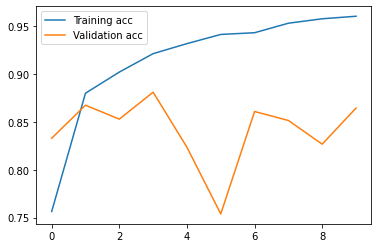

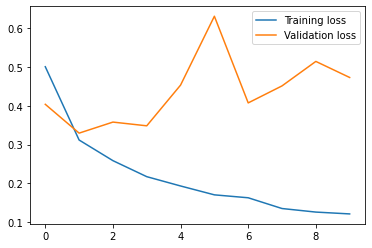

Epoch 1/10
157/157 [==============================] - 96s 585ms/step - loss: 0.6508 - acc: 0.6224 - val_loss: 0.6794 - val_acc: 0.6610
Epoch 2/10
157/157 [==============================] - 90s 571ms/step - loss: 0.3761 - acc: 0.8521 - val_loss: 0.3604 - val_acc: 0.8542
Epoch 3/10
157/157 [==============================] - 90s 573ms/step - loss: 0.2714 - acc: 0.8991 - val_loss: 0.4745 - val_acc: 0.8208
Epoch 4/10
157/157 [==============================] - 91s 578ms/step - loss: 0.2353 - acc: 0.9161 - val_loss: 0.3447 - val_acc: 0.8852
Epoch 5/10
157/157 [==============================] - 92s 587ms/step - loss: 0.2025 - acc: 0.9279 - val_loss: 0.3447 - val_acc: 0.8732
Epoch 6/10
157/157 [==============================] - 92s 586ms/step - loss: 0.1776 - acc: 0.9352 - val_loss: 0.3548 - val_acc: 0.8744
Epoch 7/10
157/157 [==============================] - 92s 588ms/step - loss: 0.1651 - acc: 0.9455 - val_loss: 0.3350 - val_acc: 0.8808
Epoch 8/10
157/157 [==============================] - 9

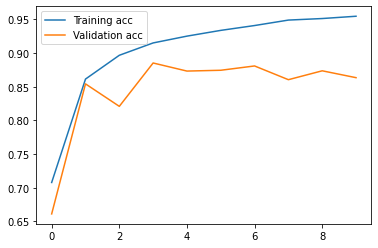

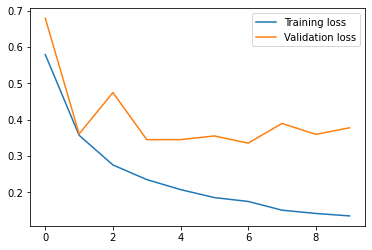

In [7]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Embedding, LSTM, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

# 텍스트의 timestep을 거꾸로 뒤바꾼 후, RNN을 돌려본다.
max_features = 10000
maxlen = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

input = Input(shape = (maxlen,))
R = Embedding(max_features, 128)(input)
R = LSTM(32)(R)
R = Dense(1)(R)
R = Activation('sigmoid')(R)

model = Model(inputs = [input], outputs = R)
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2)

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(10)

plt.plot(epochs, acc, label = 'Training acc')
plt.plot(epochs, val_acc, label = 'Validation acc')
plt.legend()
plt.show()

plt.figure()

plt.plot(epochs, loss, label = 'Training loss')
plt.plot(epochs, val_loss, label = 'Validation loss')
plt.legend()
plt.show()

# 양방향 RNN을 사용하여 imdb 데이터를 분석해본다.
input = Input(shape = (maxlen, ))
R = Embedding(max_features, 32)(input)
R = Bidirectional(LSTM(32))(R) # 양방향 RNN 층을 쌓는다.
R = Dense(1)(R)
R = Activation('sigmoid')(R)

model = Model(inputs = [input], outputs = R)
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(10)

plt.plot(epochs, acc, label = 'Training acc')
plt.plot(epochs, val_acc, label = 'Validation acc')
plt.legend()
plt.show()

plt.figure()

plt.plot(epochs, loss, label = 'Training loss')
plt.plot(epochs, val_loss, label = 'Validation loss')
plt.legend()
plt.show()
